### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Data Load

In [2]:
df = sns.load_dataset("mpg")

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
df.drop(["name"],axis=1, inplace=True) #delete name column 

### Sumary Dataset

In [6]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


### Data PreProcessing

In [7]:
df.isnull().sum() #check the null values

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [8]:
df.isnull().sum().any() #Check if are NaN or Null values in dataset

True

In [9]:
df[df.isnull().any(axis = 1)]  #Call all the null values in a list
#df[(df[df.columns[:]==0).any(axis = 1)]  #call 0 values 
#df[~(df[df.columns[:]==0).any(axis = 1)]  #call all the rows with NOT 0 values
#https://www.youtube.com/watch?v=i4cI4y9cLzg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,usa
126,21.0,6,200.0,NaN,2875,17.0,74,usa
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,usa
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,usa


In [10]:
df.dropna(inplace = True) #Delete the Nan or Null values

In [11]:
df.isnull().sum().any() #Check if are NaN or Null values in dataset

False

In [12]:
df.shape #check (rows,columns)

(392, 8)

In [13]:
df.isnull().sum() #check the null values now is 0

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

### Univariate Analysis

In [14]:
df.cylinders.unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [15]:
df.cylinders.value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

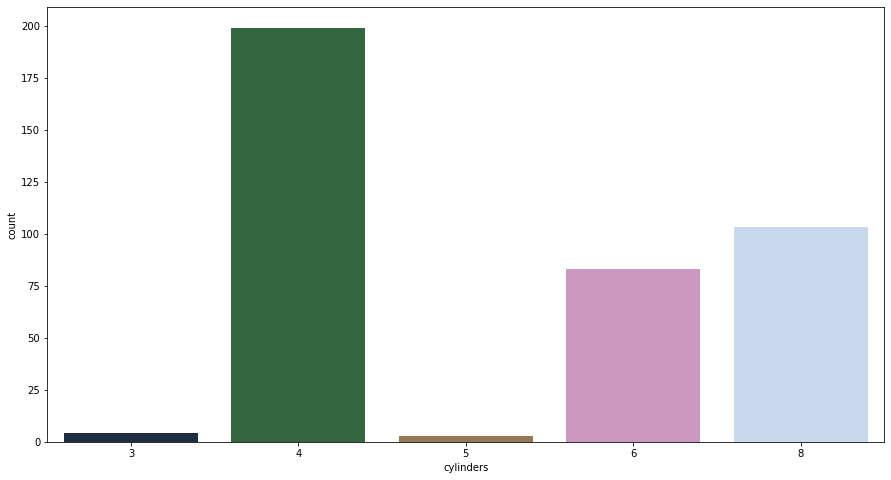

In [16]:
plt.figure(figsize = (15, 8))
sns.countplot((df.cylinders), data=df, palette = "cubehelix" )
plt.show()

In [17]:
df.model_year = (1900 + df.model_year)  #Sum 1900 column model year 

In [18]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,1970,usa
1,15.0,8,350.0,165.0,3693,11.5,1970,usa
2,18.0,8,318.0,150.0,3436,11.0,1970,usa
3,16.0,8,304.0,150.0,3433,12.0,1970,usa
4,17.0,8,302.0,140.0,3449,10.5,1970,usa


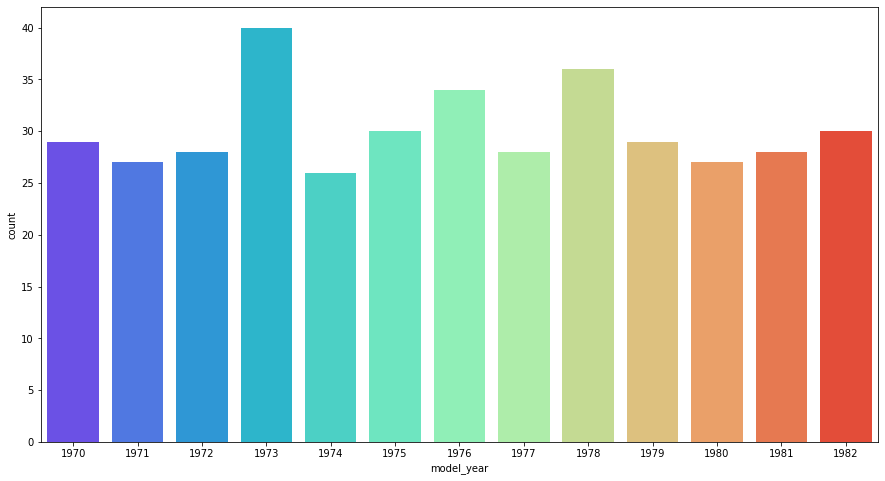

In [19]:
plt.figure(figsize = (15, 8))
sns.countplot((df.model_year), data=df, palette = "rainbow" )
plt.show()

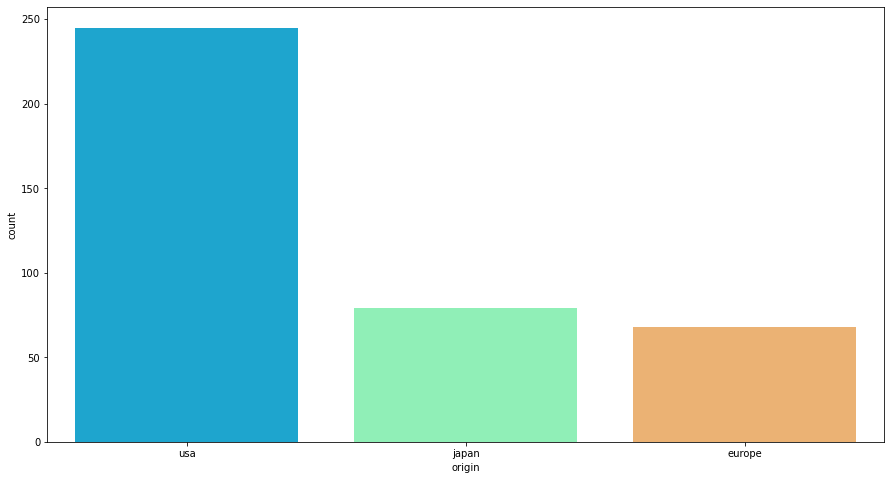

In [20]:
plt.figure(figsize = (15, 8))
sns.countplot((df.origin), data = df, palette = "rainbow" )
plt.show()

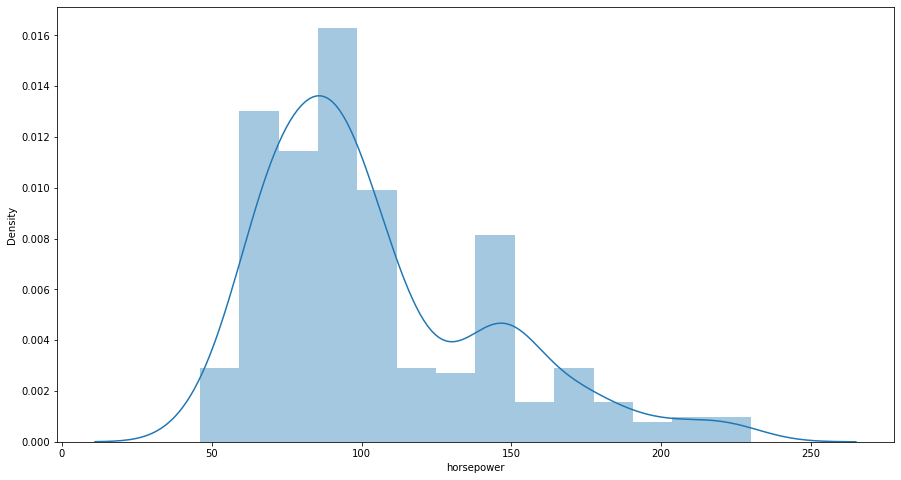

In [21]:
plt.figure(figsize = (15, 8))
sns.distplot(df.horsepower)
plt.show()

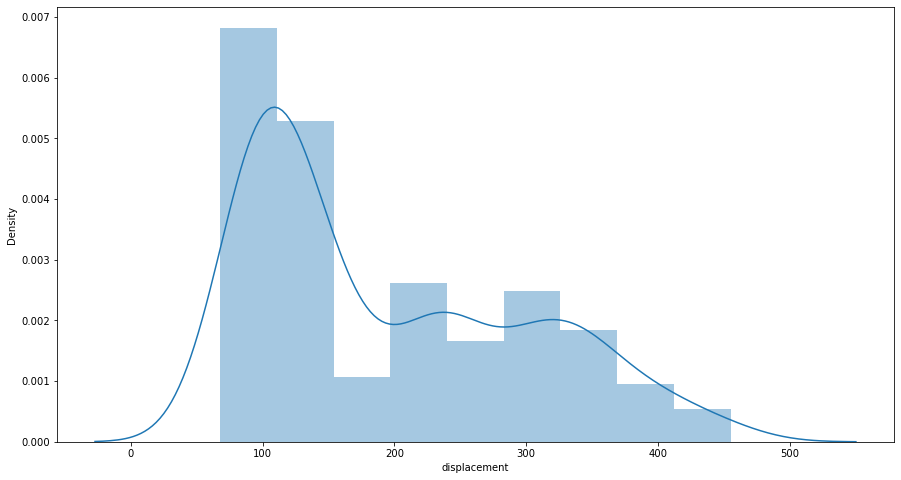

In [22]:
plt.figure(figsize = (15, 8))
sns.distplot(df.displacement)
plt.show()

### Bivariate Analysis

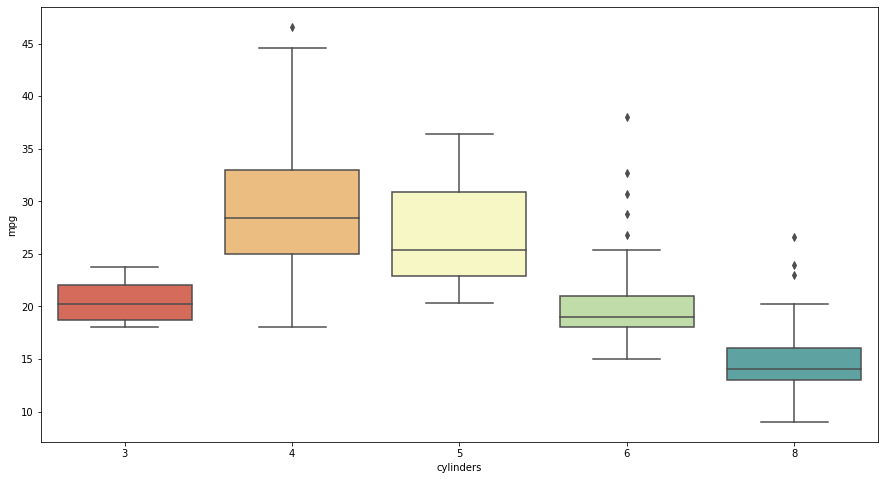

In [23]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = df.cylinders, y = df.mpg, data = df, palette = "Spectral")
plt.show()

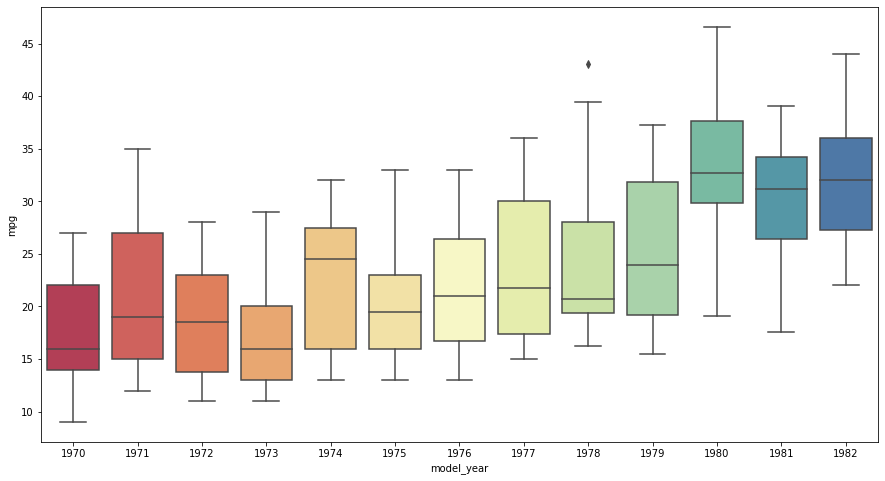

In [24]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = df.model_year, y = df.mpg, data = df, palette = "Spectral")
plt.show()

### Multivariable Analysis

<Figure size 1080x576 with 0 Axes>

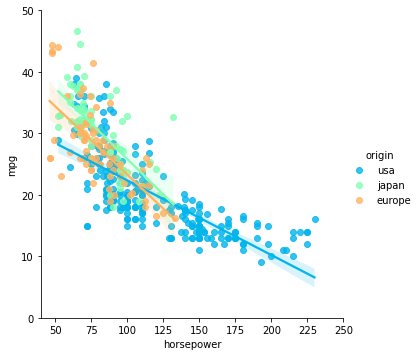

In [25]:
plt.figure(figsize = (15, 8))
g = sns.lmplot(x = "horsepower", y="mpg", hue = "origin", data = df, palette = "rainbow") #hue = 3 variable in graph label

g.set(xlim = (40 , 250))
g.set(ylim = (0 , 50))
plt.show()

<Figure size 1152x576 with 0 Axes>

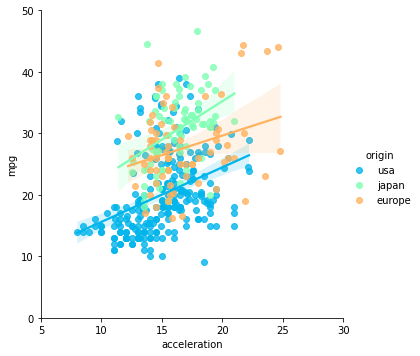

In [26]:
plt.figure(figsize = (16, 8))
g = sns.lmplot(x = "acceleration", y="mpg", hue = "origin", data = df, palette = "rainbow") #hue = 3 variable in graph label
g.set(xlim = (5 , 30))
g.set(ylim = (0 , 50))
plt.show()

<Figure size 1152x576 with 0 Axes>

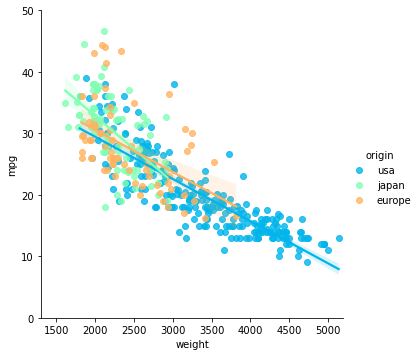

In [27]:
plt.figure(figsize = (16, 8))
g = sns.lmplot(x = "weight", y="mpg", hue = "origin", data = df, palette = "rainbow") #hue = 3 variable in graph label
g.set(xlim = (1300 , 5200))
g.set(ylim = (0 , 50))
plt.show()

### Heatmap Correlation Matrix

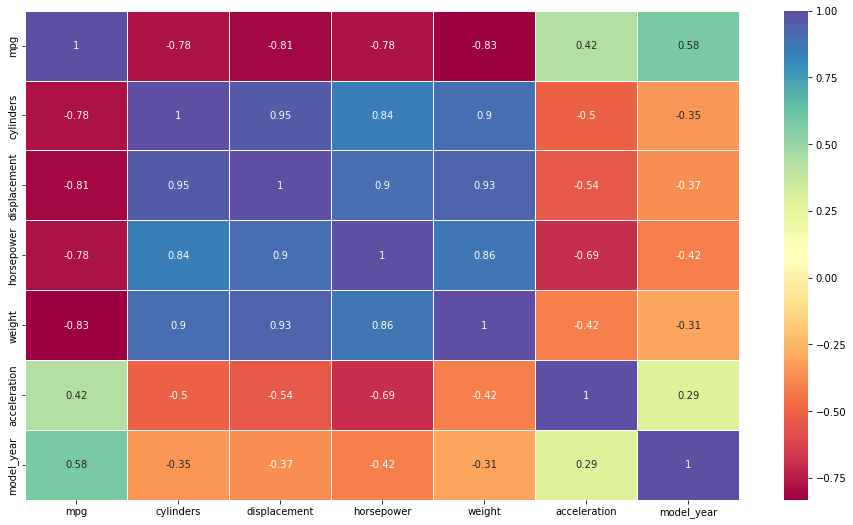

In [28]:
plt.figure(figsize = (16, 9))
sns.heatmap(df.corr(), annot = True, cmap = "Spectral", linewidth = 1)
plt.show()

In [29]:
df.drop(["displacement", "acceleration"], axis = 1, inplace = True)   #remove aceleration and displacement to avoid the overfitting in the model, 

In [30]:
df.head()

,mpg,cylinders,horsepower,weight,model_year,origin
0,18.0,8,130.0,3504,1970,usa
1,15.0,8,165.0,3693,1970,usa
2,18.0,8,150.0,3436,1970,usa
3,16.0,8,150.0,3433,1970,usa
4,17.0,8,140.0,3449,1970,usa


In [31]:
from datetime import datetime

In [32]:
today = datetime.today()

In [33]:
today

datetime.datetime(2022, 12, 17, 17, 43, 23, 763505)

In [34]:
actual_year = today.year
actual_year

2022

In [35]:
df["age"] = actual_year - df.model_year #Create a new column with the car age using the actual_year variable

In [36]:
df.head()

,mpg,cylinders,horsepower,weight,model_year,origin,age
0,18.0,8,130.0,3504,1970,usa,52
1,15.0,8,165.0,3693,1970,usa,52
2,18.0,8,150.0,3436,1970,usa,52
3,16.0,8,150.0,3433,1970,usa,52
4,17.0,8,140.0,3449,1970,usa,52


In [37]:
df.drop(["model_year"], axis = 1, inplace = True) #delete model_year column

In [38]:
df.head()

,mpg,cylinders,horsepower,weight,origin,age
0,18.0,8,130.0,3504,usa,52
1,15.0,8,165.0,3693,usa,52
2,18.0,8,150.0,3436,usa,52
3,16.0,8,150.0,3433,usa,52
4,17.0,8,140.0,3449,usa,52


In [39]:
df.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [40]:
df = pd.get_dummies(df, drop_first = True)  # ??????

In [41]:
df.head()

,mpg,cylinders,horsepower,weight,age,origin_japan,origin_usa
0,18.0,8,130.0,3504,52,0,1
1,15.0,8,165.0,3693,52,0,1
2,18.0,8,150.0,3436,52,0,1
3,16.0,8,150.0,3433,52,0,1
4,17.0,8,140.0,3449,52,0,1


### Modelling

In [42]:
x = df.drop(["mpg"], axis = 1)   #Divide the X and Y 
y = df.mpg

In [43]:
from sklearn.model_selection import train_test_split #Library for the train data set model

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
#Create the training set test_size = 0.2, random_state = are the most common values

In [47]:
x_train

,cylinders,horsepower,weight,age,origin_japan,origin_usa
260,6,110.0,3620,44,0,1
184,4,92.0,2572,46,0,1
174,6,97.0,2984,47,0,1
64,8,150.0,4135,50,0,1
344,4,64.0,1875,41,0,1
...,...,...,...,...,...,...
72,8,150.0,3892,50,0,1
107,6,100.0,2789,49,0,1
272,4,85.0,2855,44,0,1
352,4,65.0,2380,41,0,1


In [46]:
y_train

260    18.6
184    25.0
174    18.0
64     15.0
344    39.0
       ... 
72     15.0
107    18.0
272    23.8
352    29.9
103    11.0
Name: mpg, Length: 313, dtype: float64

In [51]:
from sklearn.linear_model import LinearRegression #Library  

In [52]:
lm_model = LinearRegression () #create a LinearRegression obj

In [53]:
lm_model.fit(x_train, y_train) #Training model

LinearRegression()

In [55]:
lm_model.intercept_  #Value to X=0 Y=?

78.2446124432746

In [56]:
coef_param = pd.DataFrame(lm_model.coef_, index = x.columns, columns = ["Coefficient"])
coef_param

,Coefficient
cylinders,0.203056
horsepower,-0.014143
weight,-0.005729
age,-0.779904
origin_japan,0.401853
origin_usa,-2.385047


In [57]:
y_pred = lm_model.predict(x_test)   #Use the data test to predict values 

In [58]:
my_dict = {"Actual" : y_test, "Pred" : y_pred}   #Create a df to compare the values
compare = pd.DataFrame(my_dict)  #df saves the dict values

In [59]:
compare.sample(10)

,Actual,Pred
248,36.1,33.982286
169,20.0,22.314063
152,19.0,20.379654
85,13.0,13.305170
117,29.0,29.452644
257,19.4,23.099442
95,12.0,7.722727
393,27.0,28.275664
15,22.0,18.949298
111,18.0,27.599259


In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #Importe the metrics to check the perform of the model

In [62]:
def evaluation_metrics(actual,pred): #Crate a fuction to metrics values
    MAE = mean_absolute_error(actual, pred)
    MSE = mean_squared_error(actual, pred)
    RMSE = np.sqrt(mean_squared_error(actual, pred))
    SCORE = r2_score (actual, pred)
    return print ("r2_score:", SCORE, "\n", "mean_absolute_error:", MAE, "\n", "mean_squared_error:", MSE, "\n", "root_mean_squared_error:",RMSE)

In [63]:
evaluation_metrics (y_test, y_pred)

r2_score: 0.7798249880881913 
 mean_absolute_error: 2.518828157615086 
 mean_squared_error: 11.23786102282303 
 root_mean_squared_error: 3.3522919059686656


In [64]:
!pip install yellowbrick #library for better visualization

<bound method Visualizer.show of PredictionError(ax=<AxesSubplot:>, estimator=LinearRegression())>

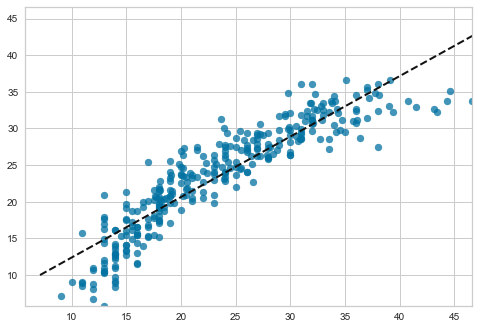

In [65]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(lm_model)
visualizer.fit(x_train, y_train)
visualizer.score(x_train, y_train)

visualizer.show

YellowbrickAttributeError: neither visualizer 'ResidualsPlot' nor wrapped estimator 'LinearRegression' have attribute 'line_color'

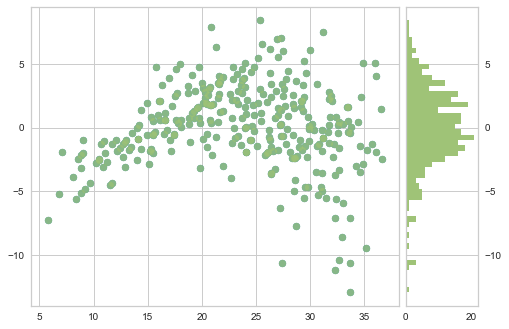

In [68]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(lm_model)

visualizer.fit(x_train, y_train)
visualizer.score(x_train, y_train)

visualizer.show